In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


In [3]:
dp1 = pd.read_csv('dataset1.csv', sep=';')
dp2 = pd.read_csv('dataset2.csv', sep=';')

dp1.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,"29,85","29,85",No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,"56,95","1889,5",No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,"53,85","108,15",Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),"42,3","1840,75",No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,"70,7","151,65",Yes


In [4]:
dp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [5]:
dp2.info()
dp2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        1605 non-null   object
 1   complaint         1605 non-null   object
 2   complaint_number  1605 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 37.7+ KB


,customerID,complaint,complaint_number
0,9565-DJPIB,The streaming TV service frequently buffers or...,1
1,4342-HFXWS,The DSL internet service has been inconsistent...,1
2,4342-HFXWS,The streaming TV service often buffers excessi...,2
3,4342-HFXWS,"Despite having tech support included, it takes...",3
4,4342-HFXWS,The device protection plan I pay for did not c...,4


In [6]:
dp1.isnull().sum().sum()
dp2.isnull().sum().sum()

np.int64(0)

In [7]:
dp1.duplicated().sum()
dp2.duplicated().sum()

np.int64(0)

In [8]:
# make variable gender binary (1 male, 0 female), same for other binary variables
dp1["gender"] = dp1["gender"].map({"Male": 1, "Female": 0}).astype(int)
dp1["Partner"] = dp1["Partner"].map({"Yes": 1, "No": 0}).astype(int)
dp1["Dependents"] = dp1["Dependents"].map({"Yes": 1, "No": 0}).astype(int)
dp1["PhoneService"] = dp1["PhoneService"].map({"Yes": 1, "No": 0}).astype(int)
dp1["MultipleLines"] = dp1["MultipleLines"].map({"Yes": 1, "No": 0, "No phone service": 0}).astype(int)
dp1["OnlineSecurity"] = dp1["OnlineSecurity"].map({"Yes": 1, "No": 0, "No internet service": 0}).astype(int)
dp1["OnlineBackup"] = dp1["OnlineBackup"].map({"Yes": 1, "No": 0, "No internet service": 0}).astype(int)
dp1["DeviceProtection"] = dp1["DeviceProtection"].map({"Yes": 1, "No": 0, "No internet service": 0}).astype(int)
dp1["TechSupport"] = dp1["TechSupport"].map({"Yes": 1, "No": 0, "No internet service": 0}).astype(int)
dp1["StreamingTV"] = dp1["StreamingTV"].map({"Yes": 1, "No": 0, "No internet service": 0}).astype(int)
dp1["StreamingMovies"] = dp1["StreamingMovies"].map({"Yes": 1, "No": 0, "No internet service": 0}).astype(int)
dp1["PaperlessBilling"] = dp1["PaperlessBilling"].map({"Yes": 1, "No": 0}).astype(int)
dp1["Churn"] = dp1["Churn"].map({"Yes": 1, "No": 0}).astype(int)


In [9]:
# convert numerical variables with dtype object into float 
dp1["MonthlyCharges"] = dp1["MonthlyCharges"].str.replace(",", ".").astype(float)
dp1["TotalCharges"] = dp1["TotalCharges"].replace(' ', '0').str.replace(",", ".").astype(float)


In [10]:
dp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [11]:
# payment method expressed as number 
dp1["PaymentMethod"] = dp1["PaymentMethod"].map({"Electronic check": 1, "Mailed check": 2, "Bank transfer (automatic)": 3, "Credit card (automatic)": 4})

In [12]:
# internet service as number 
dp1["InternetService"] = dp1["InternetService"].map({"DSL": 1, "Fiber optic": 2, "No": 0})


In [13]:
dp1["Contract"].unique()
dp1["Contract"] = dp1["Contract"].map({"Month-to-month": 1, "One year": 2, "Two year": 3})

DATA ANALYSIS 

In [14]:
dp = dp1.drop(columns=["customerID"])
dp.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,1,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,2,0,2,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,1,1,2,53.85,108.15,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,2,0,3,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,1,1,1,70.70,151.65,1


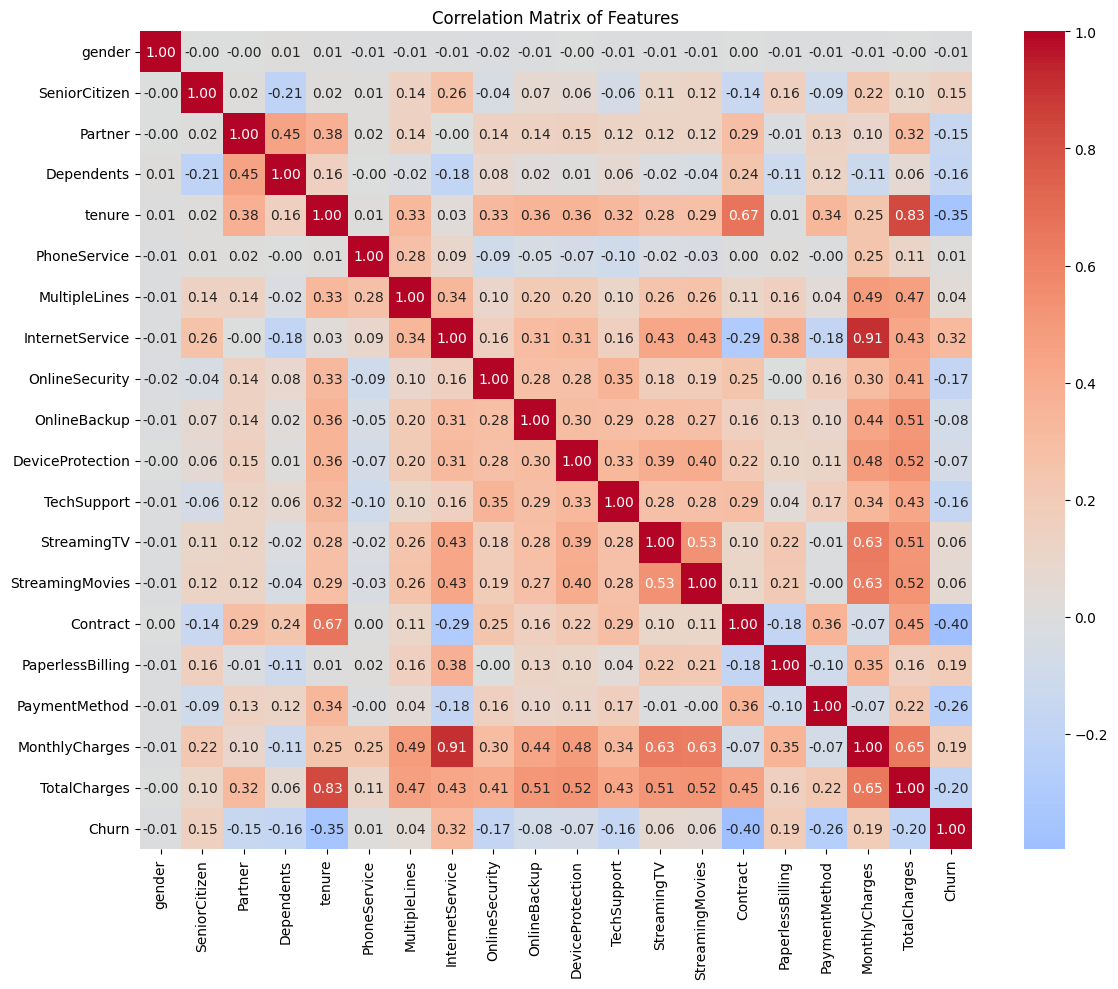

In [15]:
# Create correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = dp.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

Churn rate: 26.54%


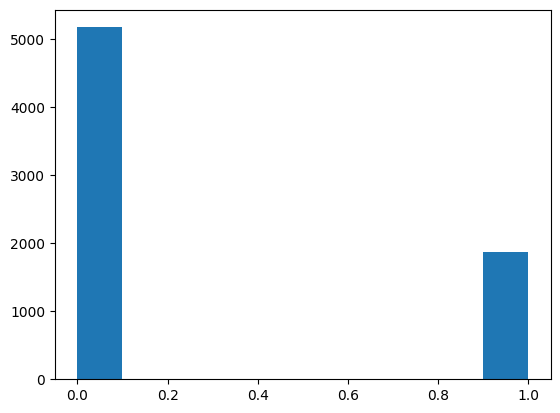

In [16]:
plt.hist(dp["Churn"])
churn_rate = dp["Churn"].mean()
print(f"Churn rate: {churn_rate:.2%}")

churn rate for users with monthly contract is: 0.4270967741935484
churn rate for users with yearly contract is: 0.11269517990495587
churn rate for users with 2 years contract is: 0.02831858407079646
The percentage of people with that churned and have monthly contract is: 0.8855002675227395
The percentage of people with that churned and have monthly contract is: 0.0888175494917068
The percentage of people with that churned and have monthly contract is: 0.025682182985553772


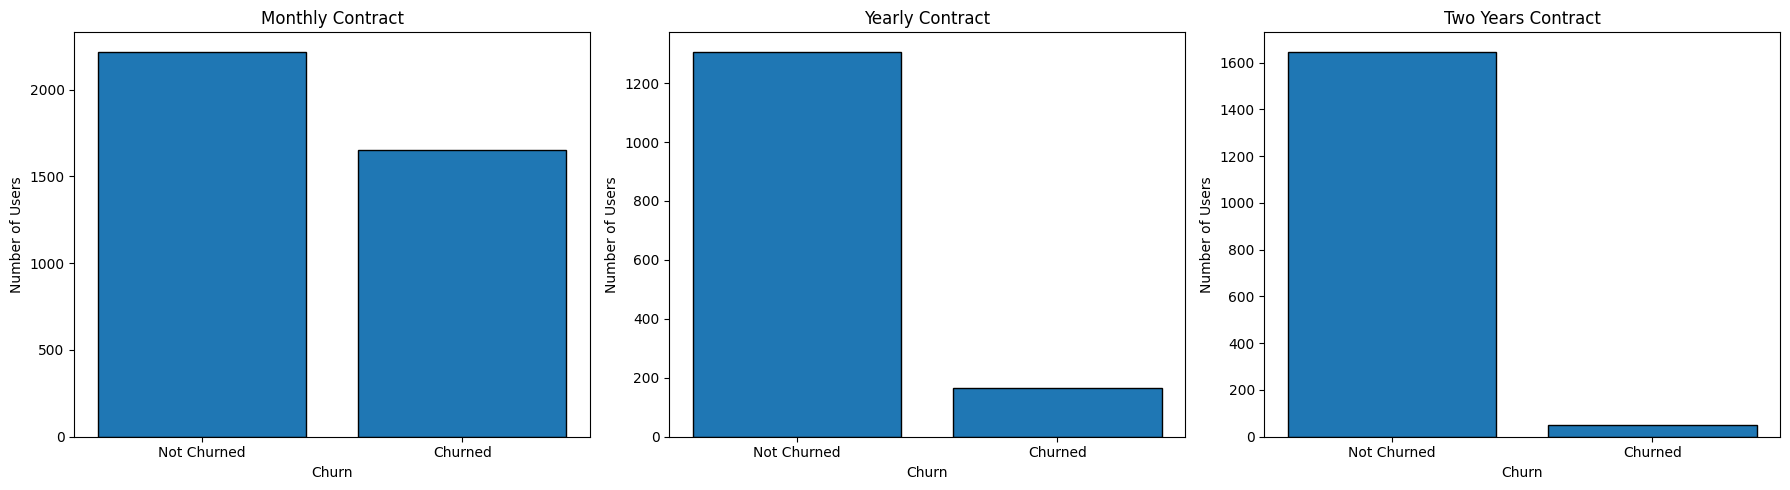

In [17]:
# CHURN RATE FOR DIFFERENT CONTRACTS LENGTH 

monthly = dp[dp["Contract"] == 1]
yearly = dp[dp["Contract"] == 2]
two_years = dp[dp["Contract"] == 3]

print("churn rate for users with monthly contract is:", monthly["Churn"].sum() / len(monthly))
print("churn rate for users with yearly contract is:", yearly["Churn"].sum() / len(yearly))
print("churn rate for users with 2 years contract is:", two_years["Churn"].sum() / len(two_years))

churned = dp[dp["Churn"] == 1]
print("The percentage of people with that churned and have monthly contract is:", len(churned[churned["Contract"] == 1]) / len(churned))
print("The percentage of people with that churned and have monthly contract is:", len(churned[churned["Contract"] == 2]) / len(churned))
print("The percentage of people with that churned and have monthly contract is:", len(churned[churned["Contract"] == 3]) / len(churned))

# Set up the figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# First plot: Monthly contract
axes[0].hist(monthly["Churn"], bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.8)
axes[0].set_title("Monthly Contract")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Not Churned", "Churned"])
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Number of Users")

# Second plot: Yearly contract
axes[1].hist(yearly["Churn"], bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.8)
axes[1].set_title("Yearly Contract")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Not Churned", "Churned"])
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Number of Users")

# Third plot: Two years contract
axes[2].hist(two_years["Churn"], bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.8)
axes[2].set_title("Two Years Contract")
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(["Not Churned", "Churned"])
axes[2].set_xlabel("Churn")
axes[2].set_ylabel("Number of Users")

# Adjust layout
plt.tight_layout()
plt.show()

Percentage of churned users paying with Electronic Check: 57.30%
Percentage of churned users paying with Mailed Check: 16.48%
Percentage of churned users paying with Bank Transfer (automatic): 13.80%
Percentage of churned users paying with Credit Card (automatic): 12.41%


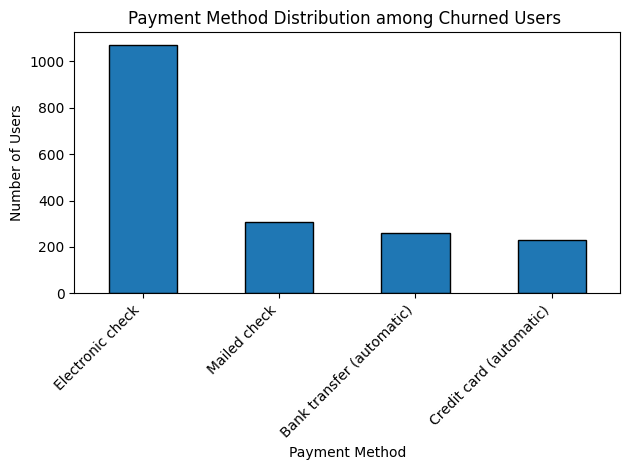

In [18]:
# LOOK AT DIFFERENCES IN PAYMENT METHODS
#dp1["PaymentMethod"] = dp1["PaymentMethod"].map({"Electronic check": 1, "Mailed check": 2, "Bank transfer (automatic)": 3, "Credit card (automatic)": 4})

# Calculate percentages
total_churned = len(churned)

electronic_check_pct = len(churned[churned["PaymentMethod"] == 1]) / total_churned
mailed_check_pct = len(churned[churned["PaymentMethod"] == 2]) / total_churned
bank_transfer_pct = len(churned[churned["PaymentMethod"] == 3]) / total_churned
credit_card_pct = len(churned[churned["PaymentMethod"] == 4]) / total_churned

# Print results
print(f"Percentage of churned users paying with Electronic Check: {electronic_check_pct:.2%}")
print(f"Percentage of churned users paying with Mailed Check: {mailed_check_pct:.2%}")
print(f"Percentage of churned users paying with Bank Transfer (automatic): {bank_transfer_pct:.2%}")
print(f"Percentage of churned users paying with Credit Card (automatic): {credit_card_pct:.2%}")

# Map numbers back to readable names
payment_labels = {
    1: "Electronic check",
    2: "Mailed check",
    3: "Bank transfer (automatic)",
    4: "Credit card (automatic)"
}

# Replace numbers with labels temporarily for plotting
churned_payment = churned["PaymentMethod"].map(payment_labels)

# Create a cute bar plot
churned_payment.value_counts().plot(kind="bar", edgecolor='black')

plt.title("Payment Method Distribution among Churned Users ")
plt.xlabel("Payment Method")
plt.ylabel("Number of Users")
plt.xticks(rotation=45, ha="right")  # Rotate labels nicely
plt.tight_layout()
plt.show()


Churn rate for Electronic Check: 45.29%
Churn rate for Mailed Check: 19.11%
Churn rate for Bank Transfer (automatic): 16.71%
Churn rate for Credit Card (automatic): 15.24%


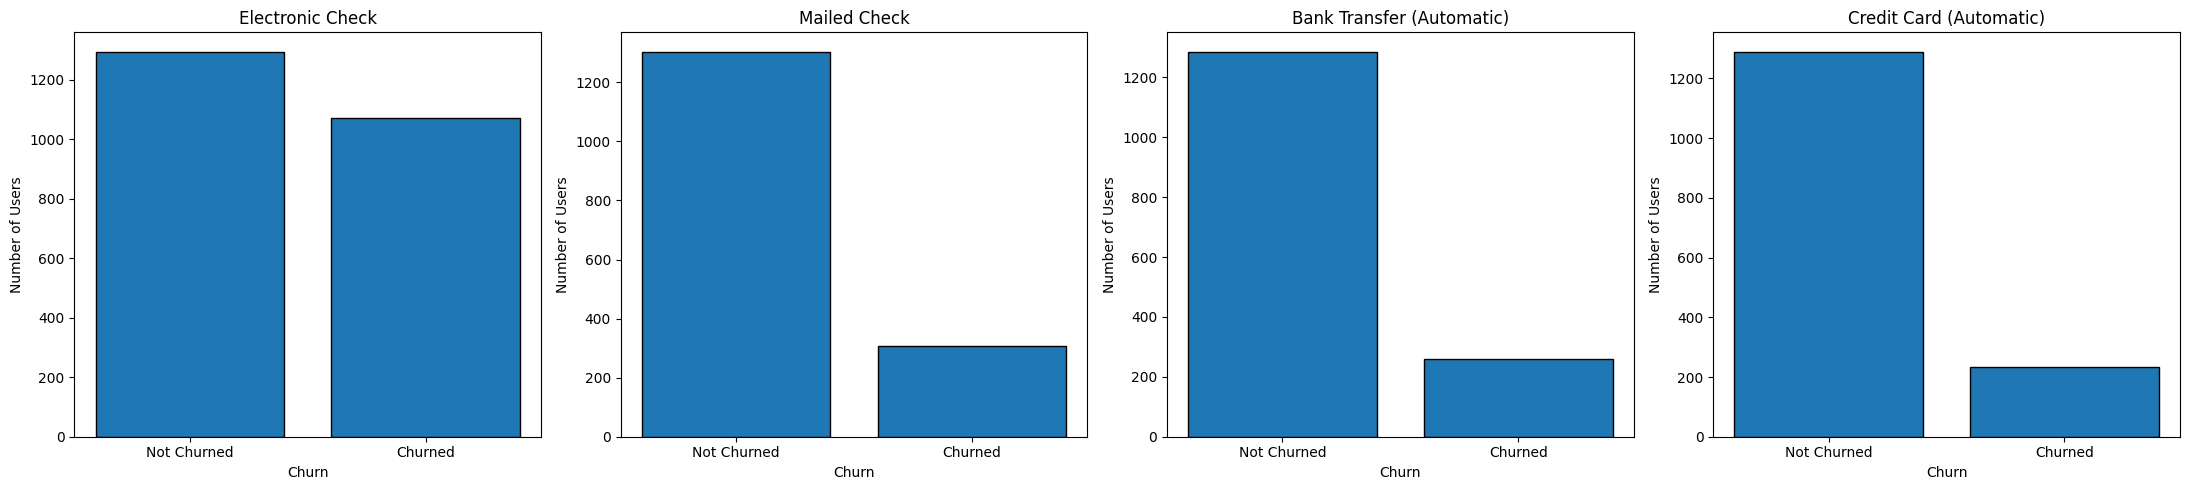

In [19]:
# churn rate for each payment method
electronic_check = dp[dp["PaymentMethod"] == 1]
mailed_check = dp[dp["PaymentMethod"] == 2]
bank_transfer = dp[dp["PaymentMethod"] == 3]
credit_card = dp[dp["PaymentMethod"] == 4]

# First, calculate and print churn rates
print(f"Churn rate for Electronic Check: {electronic_check['Churn'].mean():.2%}")
print(f"Churn rate for Mailed Check: {mailed_check['Churn'].mean():.2%}")
print(f"Churn rate for Bank Transfer (automatic): {bank_transfer['Churn'].mean():.2%}")
print(f"Churn rate for Credit Card (automatic): {credit_card['Churn'].mean():.2%}")

# Then, plot 4 histograms side-by-side
fig, axes = plt.subplots(1, 4, figsize=(22, 5))

# Plot for Electronic Check
axes[0].hist(electronic_check["Churn"], bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.8)
axes[0].set_title("Electronic Check")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Not Churned", "Churned"])
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Number of Users")

# Plot for Mailed Check
axes[1].hist(mailed_check["Churn"], bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.8)
axes[1].set_title("Mailed Check")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Not Churned", "Churned"])
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Number of Users")

# Plot for Bank Transfer
axes[2].hist(bank_transfer["Churn"], bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.8)
axes[2].set_title("Bank Transfer (Automatic)")
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(["Not Churned", "Churned"])
axes[2].set_xlabel("Churn")
axes[2].set_ylabel("Number of Users")

# Plot for Credit Card
axes[3].hist(credit_card["Churn"], bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.8)
axes[3].set_title("Credit Card (Automatic)")
axes[3].set_xticks([0, 1])
axes[3].set_xticklabels(["Not Churned", "Churned"])
axes[3].set_xlabel("Churn")
axes[3].set_ylabel("Number of Users")

plt.tight_layout()
plt.show()



Fiber Optic: 0.4395854039471816; DSL: 0.34374556297032516; No Internet: 0.21666903308249325


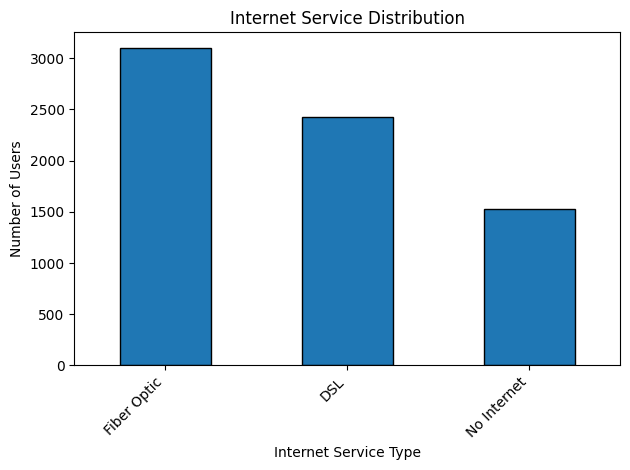

In [20]:
# COMPARE DIFFERENT INTERNET SERVICES
#dp1["InternetService"] = dp1["InternetService"].map({"DSL": 1, "Fiber optic": 2, "No": 0})

# check for distribution of different services
internet_labels = {
    0: "No Internet",
    1: "DSL",
    2: "Fiber Optic"
}

# Create a new column with readable names
dp["InternetServiceLabel"] = dp["InternetService"].map(internet_labels)
total_users = len(dp)
no_internet_pct = len(dp[dp["InternetService"] == 0]) / total_users
dsl_pct = len(dp[dp["InternetService"] == 1]) / total_users
fiber_optic_pct = len(dp[dp["InternetService"] == 2]) / total_users

print(f"Fiber Optic: {fiber_optic_pct}; DSL: {dsl_pct}; No Internet: {no_internet_pct}")

# Plot bar plot (better for categorical data)
dp["InternetServiceLabel"].value_counts().plot(kind="bar", edgecolor="black")

# Make it look nice
plt.title("Internet Service Distribution")
plt.xlabel("Internet Service Type")
plt.ylabel("Number of Users")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Churn rate for No Internet: 7.40%
Churn rate for DSL: 18.96%
Churn rate for Fiber Optic: 41.89%


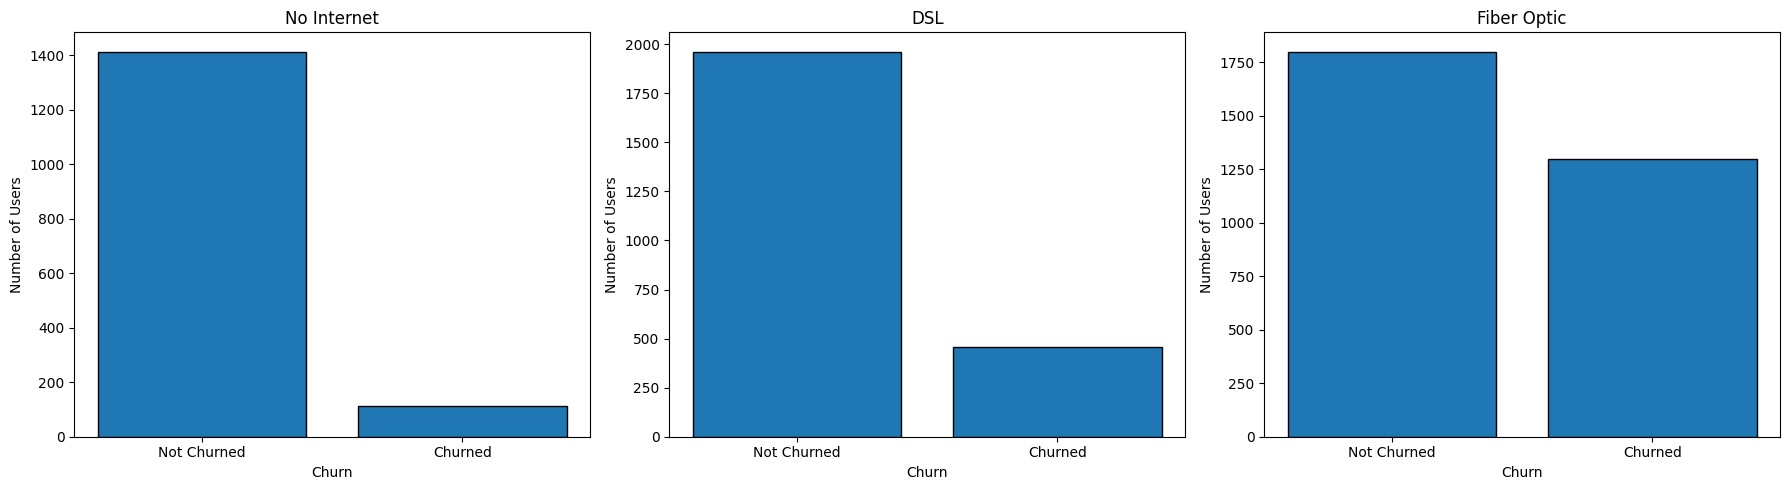

In [21]:
# CHURN RATE FOR EACH CATEGORY OF INTERNET SERVICES
# Create 3 different DataFrames
no_internet = dp[dp["InternetService"] == 0]
dsl = dp[dp["InternetService"] == 1]
fiber_optic = dp[dp["InternetService"] == 2]

# Print churn rates
print(f"Churn rate for No Internet: {no_internet['Churn'].mean():.2%}")
print(f"Churn rate for DSL: {dsl['Churn'].mean():.2%}")
print(f"Churn rate for Fiber Optic: {fiber_optic['Churn'].mean():.2%}")


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# No Internet plot
axes[0].hist(no_internet["Churn"], bins=[-0.5, 0.5, 1.5], edgecolor="black", rwidth=0.8)
axes[0].set_title("No Internet")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Not Churned", "Churned"])
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Number of Users")

# DSL plot
axes[1].hist(dsl["Churn"], bins=[-0.5, 0.5, 1.5], edgecolor="black", rwidth=0.8)
axes[1].set_title("DSL")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Not Churned", "Churned"])
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Number of Users")

# Fiber Optic plot
axes[2].hist(fiber_optic["Churn"], bins=[-0.5, 0.5, 1.5], edgecolor="black", rwidth=0.8)
axes[2].set_title("Fiber Optic")
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(["Not Churned", "Churned"])
axes[2].set_xlabel("Churn")
axes[2].set_ylabel("Number of Users")

plt.tight_layout()
plt.show()

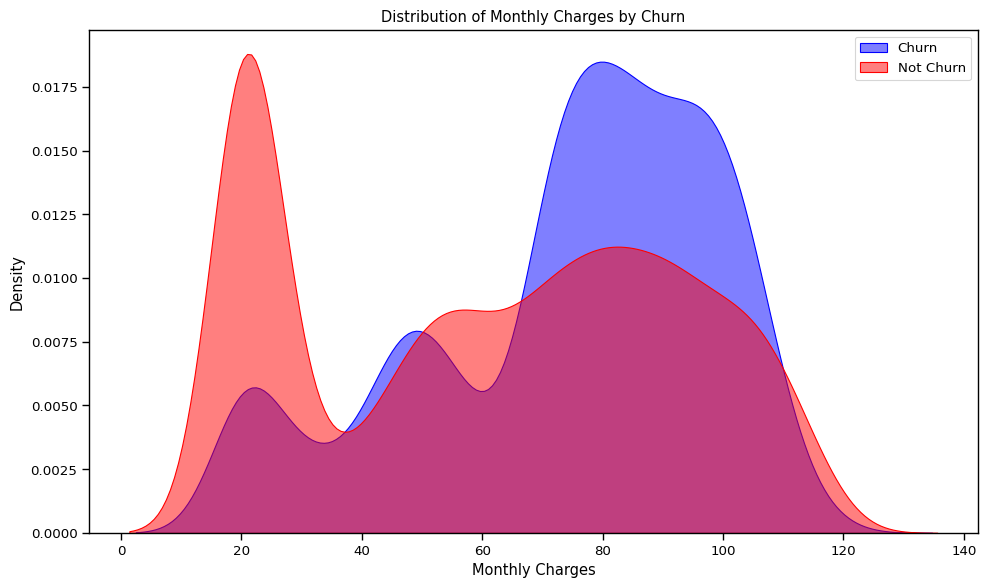

In [46]:
# LOOK AT THE MONTHLY CHARGES FEATURE
# Set seaborn context
sns.set_context("paper", font_scale=1.1)

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(
    data=dp, x="MonthlyCharges", hue="Churn", fill=True,
    palette=["red", "blue"], common_norm=False, alpha=0.5
)

# Customize plot
ax.legend(["Churn", "Not Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

plt.tight_layout()
plt.show()

/var/folders/ty/jl1vm4217zx6vktvp7bd66nm0000gn/T/ipykernel_32113/494086560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dp, x="Churn", y="MonthlyCharges", palette=["red", "blue"])


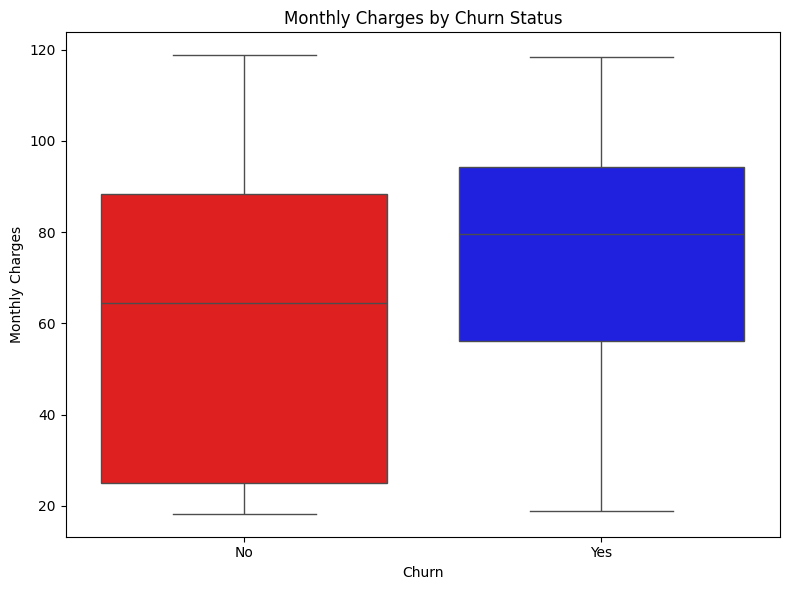

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dp, x="Churn", y="MonthlyCharges", palette=["red", "blue"])

plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

Churn rate by Monthly Charge Group:
MonthlyChargeGroup
Low       0.108934
Medium    0.239420
High      0.353614
Name: Churn, dtype: float64


/var/folders/ty/jl1vm4217zx6vktvp7bd66nm0000gn/T/ipykernel_32113/1103117630.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = dp.groupby("MonthlyChargeGroup")["Churn"].mean()


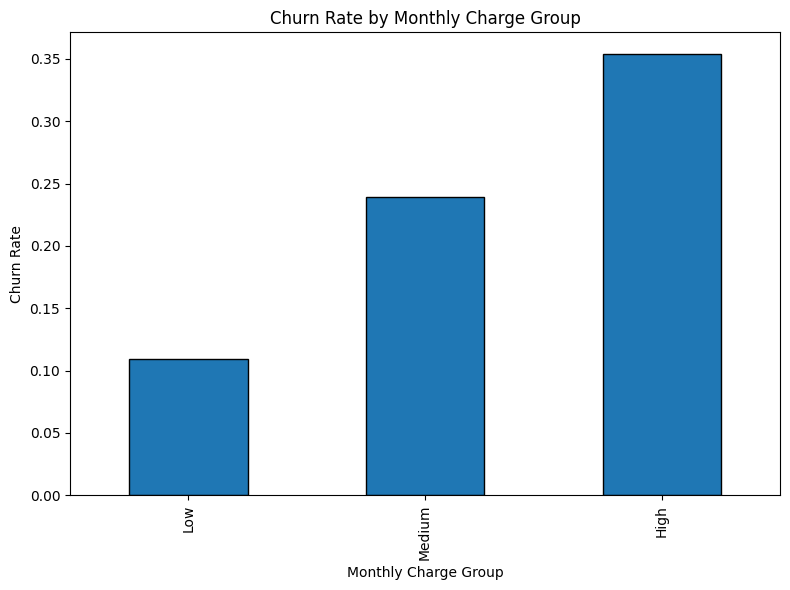

In [24]:
# Create Monthly Charge buckets
dp["MonthlyChargeGroup"] = pd.cut(dp["MonthlyCharges"], bins=[0, 35, 70, 150], labels=["Low", "Medium", "High"])

# Calculate churn rate in each group
churn_rates = dp.groupby("MonthlyChargeGroup")["Churn"].mean()

print("Churn rate by Monthly Charge Group:")
print(churn_rates)

# Plot
churn_rates.plot(kind="bar", edgecolor="black", figsize=(8,6))
plt.title("Churn Rate by Monthly Charge Group")
plt.xlabel("Monthly Charge Group")
plt.ylabel("Churn Rate")
plt.tight_layout()
plt.show()


/var/folders/ty/jl1vm4217zx6vktvp7bd66nm0000gn/T/ipykernel_32113/1074647066.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_charge_churn = dp.groupby(["MonthlyChargeGroup", "Churn"]).size().unstack()


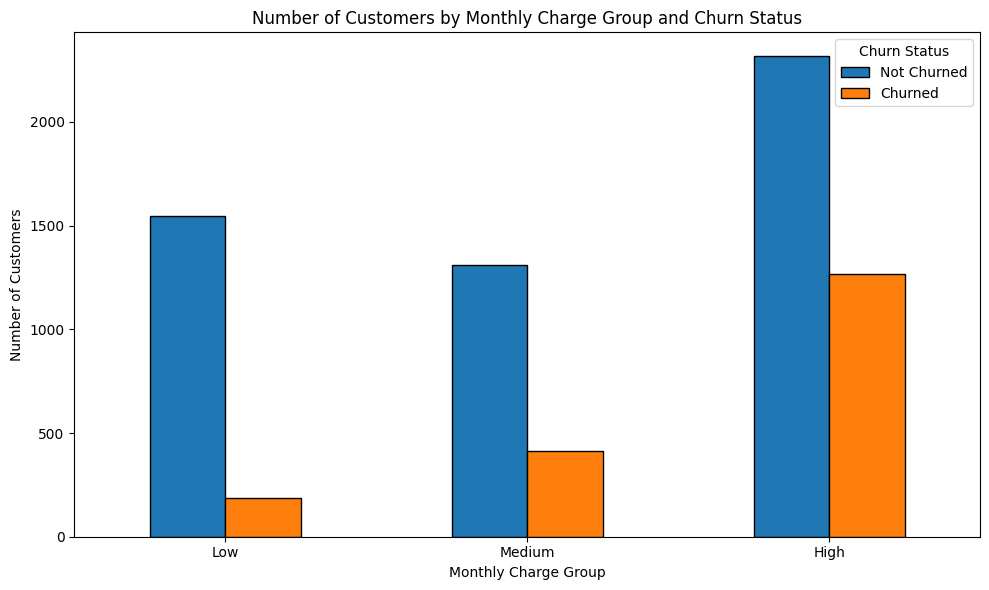

In [25]:
# First, recreate the MonthlyChargeGroup (if not already created)
dp["MonthlyChargeGroup"] = pd.cut(dp["MonthlyCharges"], bins=[0, 35, 70, 150], labels=["Low", "Medium", "High"])

# Now group by MonthlyChargeGroup and Churn
monthly_charge_churn = dp.groupby(["MonthlyChargeGroup", "Churn"]).size().unstack()

# Plot
monthly_charge_churn.plot(kind="bar", edgecolor="black", figsize=(10,6))

plt.title("Number of Customers by Monthly Charge Group and Churn Status")
plt.xlabel("Monthly Charge Group")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(["Not Churned", "Churned"], title="Churn Status")
plt.tight_layout()
plt.show()

Among churned users -> No Internet: 6.05%
Among churned users -> DSL: 24.56%
Among churned users -> Fiber Optic: 69.40%


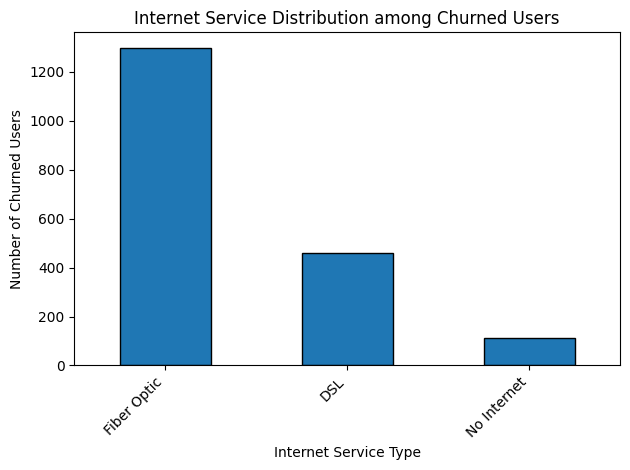

In [26]:
# PERCENTAGE OF EACH INTERNET SERVICE IN THE CHURN CLASS

# Focus only on churned users
churned = dp[dp["Churn"] == 1]

# Calculate percentages inside churned class
churned_total = len(churned)

churned_no_internet_pct = len(churned[churned["InternetService"] == 0]) / churned_total
churned_dsl_pct = len(churned[churned["InternetService"] == 1]) / churned_total
churned_fiber_optic_pct = len(churned[churned["InternetService"] == 2]) / churned_total

# Print
print(f"Among churned users -> No Internet: {churned_no_internet_pct:.2%}")
print(f"Among churned users -> DSL: {churned_dsl_pct:.2%}")
print(f"Among churned users -> Fiber Optic: {churned_fiber_optic_pct:.2%}")

churned_service_counts = churned["InternetServiceLabel"].value_counts()

# Bar plot
churned_service_counts.plot(kind="bar", edgecolor="black")

plt.title("Internet Service Distribution among Churned Users")
plt.xlabel("Internet Service Type")
plt.ylabel("Number of Churned Users")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Churn rate for customers WITHOUT dependents: 31.28%
Churn rate for customers WITH dependents: 15.45%
Churn rate for customers WITHOUT partner: 32.96%
Churn rate for customers WITH partner: 19.66%
Churn rate for NON-Senior Citizens: 23.61%
Churn rate for Senior Citizens: 41.68%


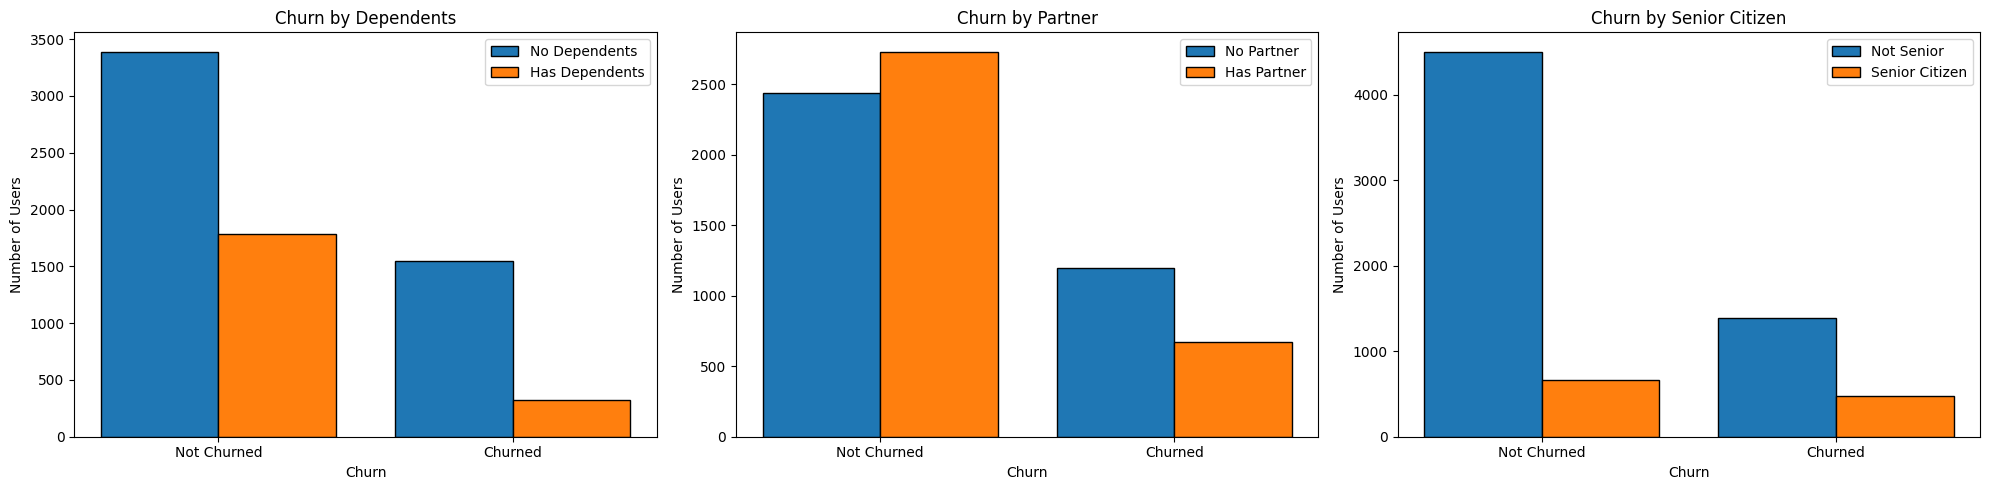

In [27]:
# Dependents
no_dependents = dp[dp["Dependents"] == 0]
has_dependents = dp[dp["Dependents"] == 1]
print(f"Churn rate for customers WITHOUT dependents: {no_dependents['Churn'].mean():.2%}")
print(f"Churn rate for customers WITH dependents: {has_dependents['Churn'].mean():.2%}")

# Partner
no_partner = dp[dp["Partner"] == 0]
has_partner = dp[dp["Partner"] == 1]
print(f"Churn rate for customers WITHOUT partner: {no_partner['Churn'].mean():.2%}")
print(f"Churn rate for customers WITH partner: {has_partner['Churn'].mean():.2%}")

# Senior Citizen
not_senior = dp[dp["SeniorCitizen"] == 0]
senior_citizen = dp[dp["SeniorCitizen"] == 1]
print(f"Churn rate for NON-Senior Citizens: {not_senior['Churn'].mean():.2%}")
print(f"Churn rate for Senior Citizens: {senior_citizen['Churn'].mean():.2%}")

# Now plot side-by-side histograms

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plot 1: Dependents vs Churn
axes[0].hist([no_dependents["Churn"], has_dependents["Churn"]], 
             bins=[-0.5, 0.5, 1.5], label=["No Dependents", "Has Dependents"], 
             edgecolor="black", rwidth=0.8)
axes[0].set_title("Churn by Dependents")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Not Churned", "Churned"])
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Number of Users")
axes[0].legend()

# Plot 2: Partner vs Churn
axes[1].hist([no_partner["Churn"], has_partner["Churn"]], 
             bins=[-0.5, 0.5, 1.5], label=["No Partner", "Has Partner"], 
             edgecolor="black", rwidth=0.8)
axes[1].set_title("Churn by Partner")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Not Churned", "Churned"])
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Number of Users")
axes[1].legend()

# Plot 3: Senior Citizen vs Churn
axes[2].hist([not_senior["Churn"], senior_citizen["Churn"]], 
             bins=[-0.5, 0.5, 1.5], label=["Not Senior", "Senior Citizen"], 
             edgecolor="black", rwidth=0.8)
axes[2].set_title("Churn by Senior Citizen")
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(["Not Churned", "Churned"])
axes[2].set_xlabel("Churn")
axes[2].set_ylabel("Number of Users")
axes[2].legend()

plt.tight_layout()
plt.show()


Churn rate for customers WITHOUT Online Security: 31.33%
Churn rate for customers WITH Online Security: 14.61%


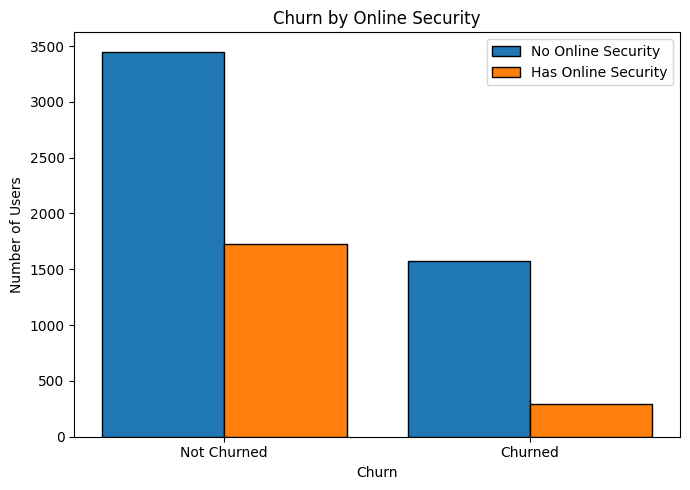

In [28]:
# LOOK AT ONLINE SECURITY FEATURE
no_online_security = dp[dp["OnlineSecurity"] == 0]
has_online_security = dp[dp["OnlineSecurity"] == 1]

# Print churn rates
print(f"Churn rate for customers WITHOUT Online Security: {no_online_security['Churn'].mean():.2%}")
print(f"Churn rate for customers WITH Online Security: {has_online_security['Churn'].mean():.2%}")

# Now plot
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.hist([no_online_security["Churn"], has_online_security["Churn"]],
        bins=[-0.5, 0.5, 1.5],
        label=["No Online Security", "Has Online Security"],
        edgecolor="black", rwidth=0.8)

ax.set_title("Churn by Online Security")
ax.set_xticks([0, 1])
ax.set_xticklabels(["Not Churned", "Churned"])
ax.set_xlabel("Churn")
ax.set_ylabel("Number of Users")
ax.legend()

plt.tight_layout()
plt.show()

Churn rate for customers WITH Paperless Billing: 33.57%
Churn rate for customers WITHOUT Paperless Billing: 16.33%


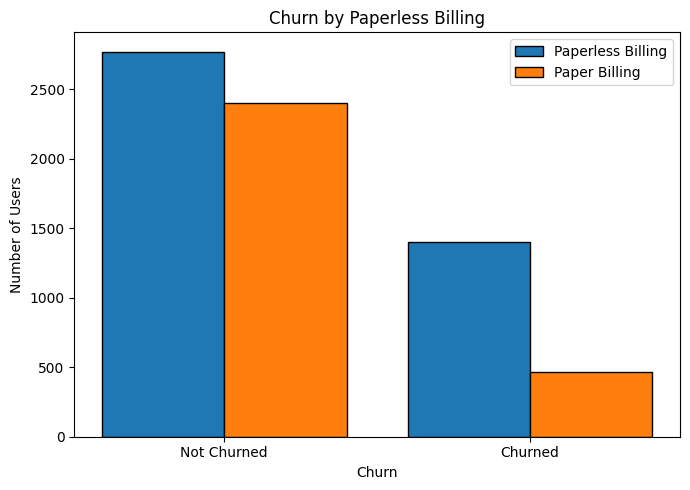

In [29]:
# LOOK AT PAPERLESS BILLING FEATURE
paperless = dp[dp["PaperlessBilling"] == 1]
not_paperless = dp[dp["PaperlessBilling"] == 0]

# Print churn rates
print(f"Churn rate for customers WITH Paperless Billing: {paperless['Churn'].mean():.2%}")
print(f"Churn rate for customers WITHOUT Paperless Billing: {not_paperless['Churn'].mean():.2%}")

# Now plot
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.hist([paperless["Churn"], not_paperless["Churn"]],
        bins=[-0.5, 0.5, 1.5],
        label=["Paperless Billing", "Paper Billing"],
        edgecolor="black", rwidth=0.8)

ax.set_title("Churn by Paperless Billing")
ax.set_xticks([0, 1])
ax.set_xticklabels(["Not Churned", "Churned"])
ax.set_xlabel("Churn")
ax.set_ylabel("Number of Users")
ax.legend()

plt.tight_layout()
plt.show()

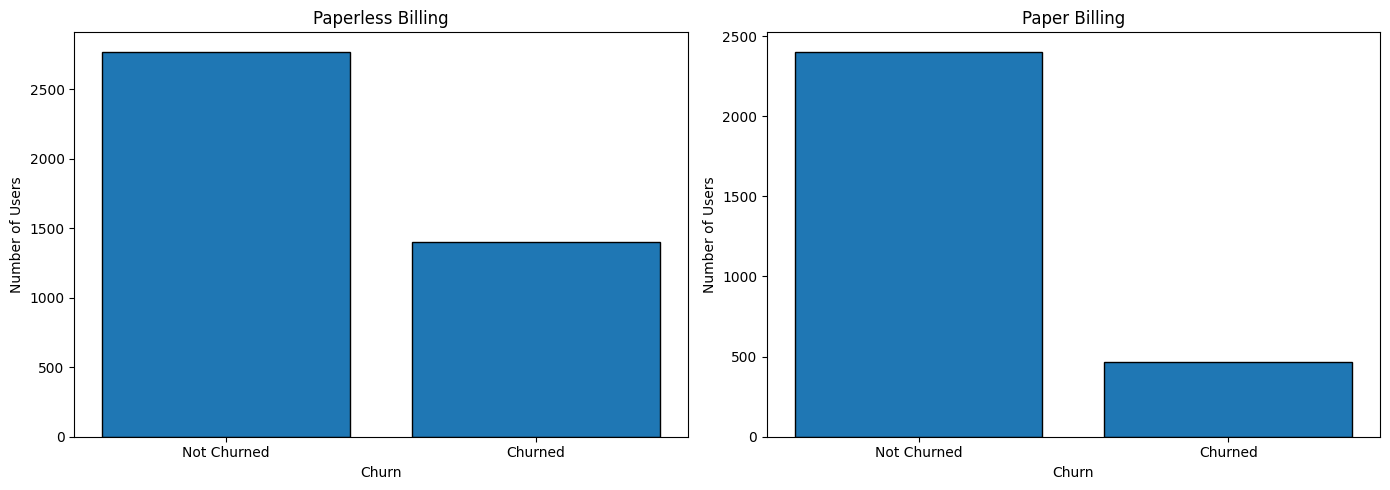

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot for customers WITH Paperless Billing
axes[0].hist(paperless["Churn"], bins=[-0.5, 0.5, 1.5], edgecolor="black", rwidth=0.8)
axes[0].set_title("Paperless Billing")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Not Churned", "Churned"])
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Number of Users")

# Plot for customers WITHOUT Paperless Billing
axes[1].hist(not_paperless["Churn"], bins=[-0.5, 0.5, 1.5], edgecolor="black", rwidth=0.8)
axes[1].set_title("Paper Billing")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Not Churned", "Churned"])
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Number of Users")

# Layout
plt.tight_layout()
plt.show()

Churn rate for customers WITHOUT Tech Support: 31.19%
Churn rate for customers WITH Tech Support: 15.17%


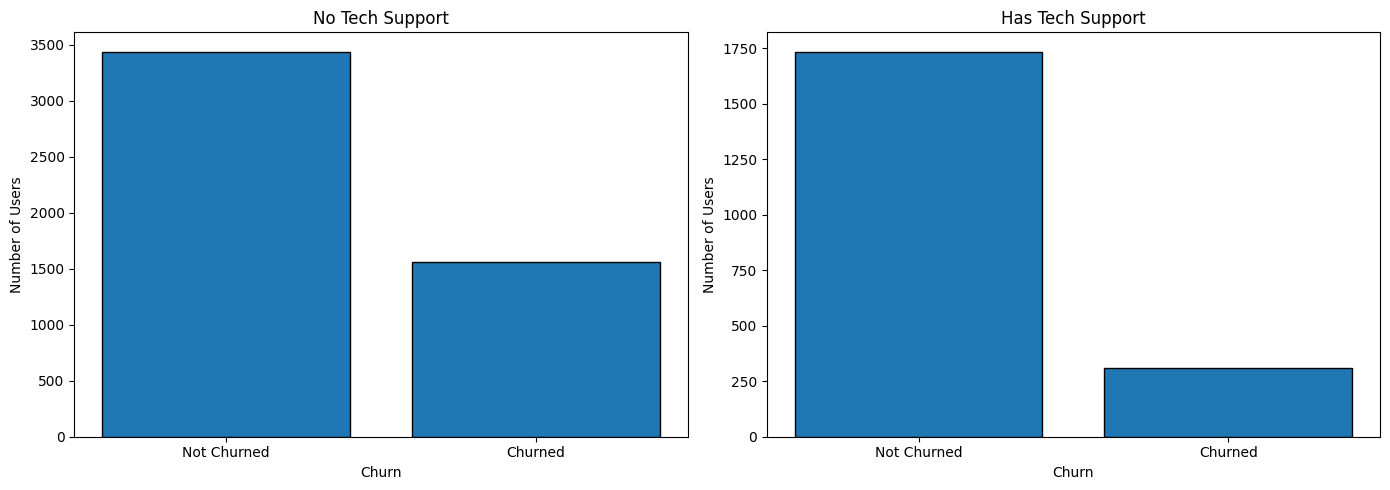

In [31]:
# LOOK AT TECH SUPPORT FEATURE
# Split data
no_tech_support = dp[dp["TechSupport"] == 0]
has_tech_support = dp[dp["TechSupport"] == 1]

# Print churn rates
print(f"Churn rate for customers WITHOUT Tech Support: {no_tech_support['Churn'].mean():.2%}")
print(f"Churn rate for customers WITH Tech Support: {has_tech_support['Churn'].mean():.2%}")

# Create the figure with 2 subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot for customers WITHOUT Tech Support
axes[0].hist(no_tech_support["Churn"], bins=[-0.5, 0.5, 1.5], edgecolor="black", rwidth=0.8)
axes[0].set_title("No Tech Support")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Not Churned", "Churned"])
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Number of Users")

# Plot for customers WITH Tech Support
axes[1].hist(has_tech_support["Churn"], bins=[-0.5, 0.5, 1.5], edgecolor="black", rwidth=0.8)
axes[1].set_title("Has Tech Support")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Not Churned", "Churned"])
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Number of Users")

# Layout
plt.tight_layout()
plt.show()

Churn rate for customers WITHOUT Online Backup: 29.17%
Churn rate for customers WITH Online Backup: 21.53%
Churn rate for customers WITHOUT Device Protection: 28.65%
Churn rate for customers WITH Device Protection: 22.50%


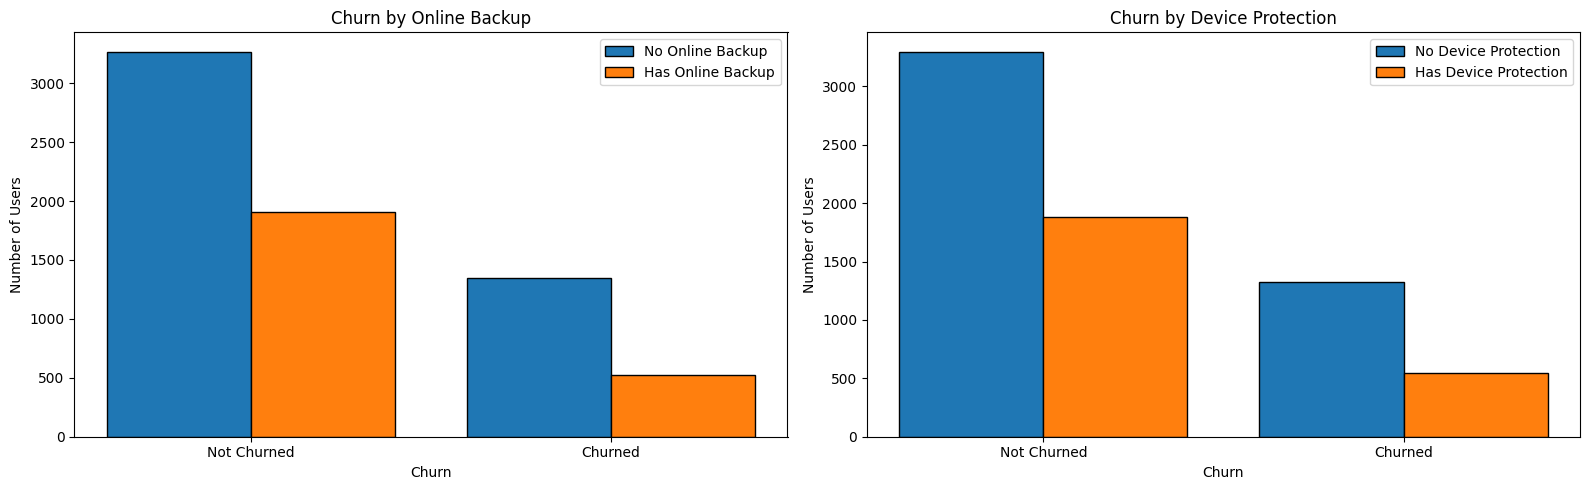

In [32]:
# ONLINE BACKUP
no_online_backup = dp[dp["OnlineBackup"] == 0]
has_online_backup = dp[dp["OnlineBackup"] == 1]

print(f"Churn rate for customers WITHOUT Online Backup: {no_online_backup['Churn'].mean():.2%}")
print(f"Churn rate for customers WITH Online Backup: {has_online_backup['Churn'].mean():.2%}")

# DEVICE PROTECTION
no_device_protection = dp[dp["DeviceProtection"] == 0]
has_device_protection = dp[dp["DeviceProtection"] == 1]

print(f"Churn rate for customers WITHOUT Device Protection: {no_device_protection['Churn'].mean():.2%}")
print(f"Churn rate for customers WITH Device Protection: {has_device_protection['Churn'].mean():.2%}")

# Create 2 plots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot for Online Backup
axes[0].hist([no_online_backup["Churn"], has_online_backup["Churn"]],
             bins=[-0.5, 0.5, 1.5],
             label=["No Online Backup", "Has Online Backup"],
             edgecolor="black", rwidth=0.8)
axes[0].set_title("Churn by Online Backup")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Not Churned", "Churned"])
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Number of Users")
axes[0].legend()

# Plot for Device Protection
axes[1].hist([no_device_protection["Churn"], has_device_protection["Churn"]],
             bins=[-0.5, 0.5, 1.5],
             label=["No Device Protection", "Has Device Protection"],
             edgecolor="black", rwidth=0.8)
axes[1].set_title("Churn by Device Protection")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Not Churned", "Churned"])
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Number of Users")
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


see just a small difference depending on whether have online backup or not, same for device protection

Churn rate for customers WITH BOTH services: 16.92%
Churn rate for customers WITHOUT BOTH services: 29.17%


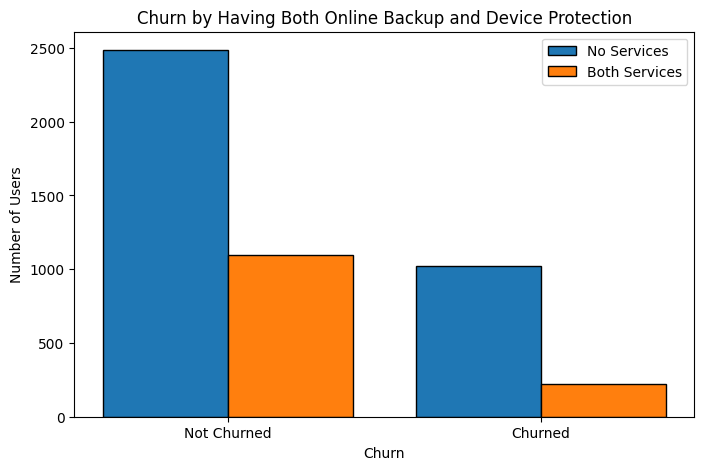

In [33]:
# Create groups
both_services = dp[(dp["OnlineBackup"] == 1) & (dp["DeviceProtection"] == 1)]
no_services = dp[(dp["OnlineBackup"] == 0) & (dp["DeviceProtection"] == 0)]

# Print churn rates
print(f"Churn rate for customers WITH BOTH services: {both_services['Churn'].mean():.2%}")
print(f"Churn rate for customers WITHOUT BOTH services: {no_services['Churn'].mean():.2%}")

# Plotting side by side
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.hist([no_services["Churn"], both_services["Churn"]],
        bins=[-0.5, 0.5, 1.5],
        label=["No Services", "Both Services"],
        edgecolor="black", rwidth=0.8)

ax.set_title("Churn by Having Both Online Backup and Device Protection")
ax.set_xticks([0, 1])
ax.set_xticklabels(["Not Churned", "Churned"])
ax.set_xlabel("Churn")
ax.set_ylabel("Number of Users")
ax.legend()

Churn rate by Tenure Group:
TenureGroup
0-12 months    0.476782
1-4 years      0.236440
4-6 years      0.095132
Name: Churn, dtype: float64


/var/folders/ty/jl1vm4217zx6vktvp7bd66nm0000gn/T/ipykernel_32113/2811478222.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates_tenure = dp.groupby("TenureGroup")["Churn"].mean()
/var/folders/ty/jl1vm4217zx6vktvp7bd66nm0000gn/T/ipykernel_32113/2811478222.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = dp.groupby(["TenureGroup", "Churn"]).size().unstack()


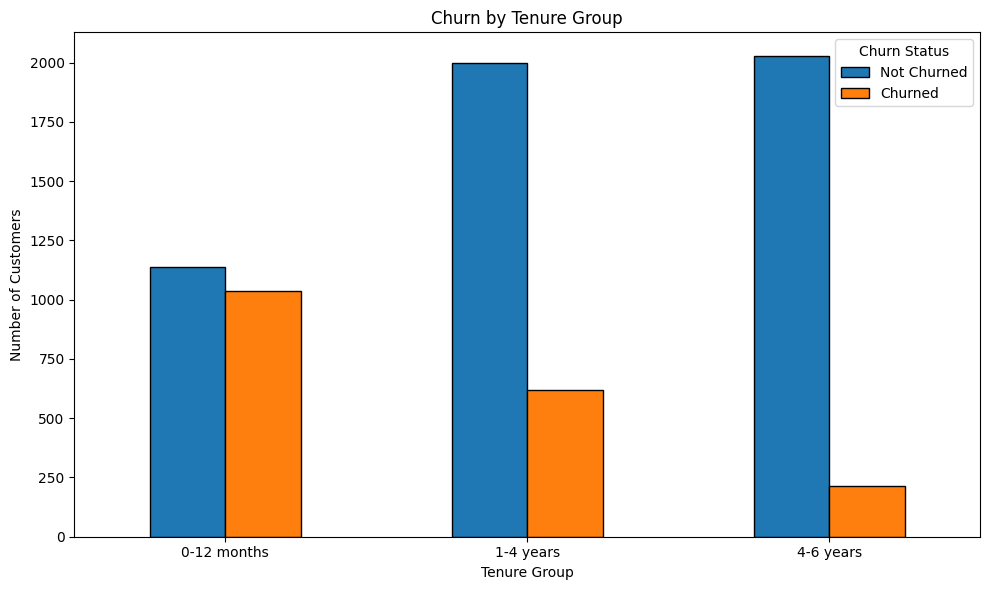

In [34]:
# LOOK AT TENURE
dp["TenureGroup"] = pd.cut(dp["tenure"], bins=[0, 12, 48, 72], labels=["0-12 months", "1-4 years", "4-6 years"])

# Calculate churn rate by tenure group
churn_rates_tenure = dp.groupby("TenureGroup")["Churn"].mean()

print("Churn rate by Tenure Group:")
print(churn_rates_tenure)

# Now number of churned vs not churned customers per group
tenure_churn = dp.groupby(["TenureGroup", "Churn"]).size().unstack()

# Plot the churned vs not churned counts
tenure_churn.plot(kind="bar", edgecolor="black", figsize=(10,6))

plt.title("Churn by Tenure Group")
plt.xlabel("Tenure Group")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(["Not Churned", "Churned"], title="Churn Status")
plt.tight_layout()
plt.show()

obviously higher tenure == lower churn rate

Churn rate for customers WITH Phone Service: 26.71%
Churn rate for customers WITHOUT Phone Service: 24.93%


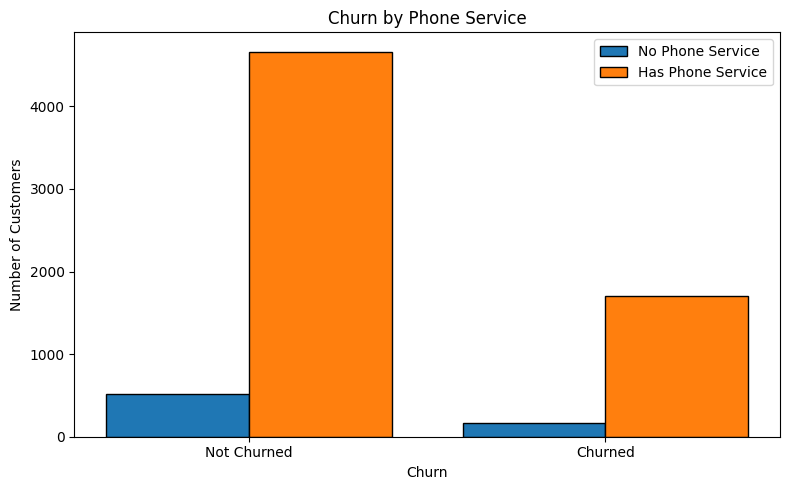

In [35]:
# LOOK AT THE PHONE SERVICE FEATURE
has_phone_service = dp[dp["PhoneService"] == 1]
no_phone_service = dp[dp["PhoneService"] == 0]

# Print churn rates
print(f"Churn rate for customers WITH Phone Service: {has_phone_service['Churn'].mean():.2%}")
print(f"Churn rate for customers WITHOUT Phone Service: {no_phone_service['Churn'].mean():.2%}")

# Now plot churned vs not churned for Phone Service
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.hist([no_phone_service["Churn"], has_phone_service["Churn"]],
        bins=[-0.5, 0.5, 1.5],
        label=["No Phone Service", "Has Phone Service"],
        edgecolor="black", rwidth=0.8)

ax.set_title("Churn by Phone Service")
ax.set_xticks([0, 1])
ax.set_xticklabels(["Not Churned", "Churned"])
ax.set_xlabel("Churn")
ax.set_ylabel("Number of Customers")
ax.legend()

plt.tight_layout()
plt.show()

no significant difference between the two groups here

Churn rate for customers WITHOUT Streaming TV: 24.33%
Churn rate for customers WITH Streaming TV: 30.07%
Churn rate for customers WITHOUT Streaming Movies: 24.38%
Churn rate for customers WITH Streaming Movies: 29.94%


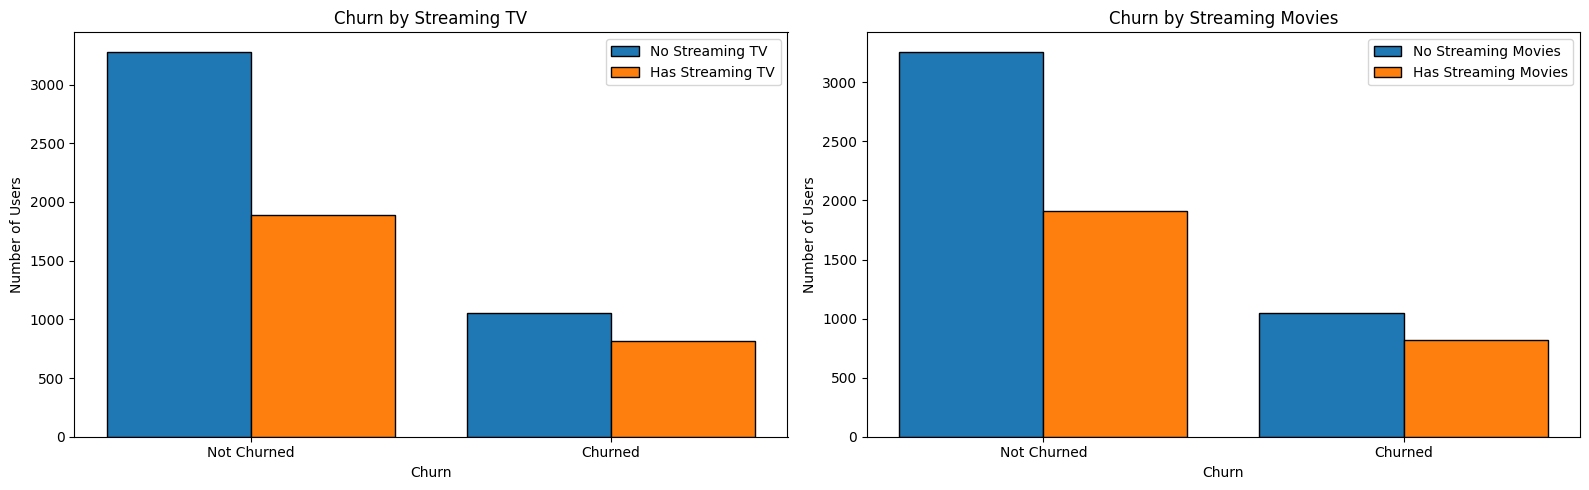

In [36]:
# STREAMING TV
no_streaming_tv = dp[dp["StreamingTV"] == 0]
has_streaming_tv = dp[dp["StreamingTV"] == 1]

print(f"Churn rate for customers WITHOUT Streaming TV: {no_streaming_tv['Churn'].mean():.2%}")
print(f"Churn rate for customers WITH Streaming TV: {has_streaming_tv['Churn'].mean():.2%}")

# STREAMING MOVIES
no_streaming_movies = dp[dp["StreamingMovies"] == 0]
has_streaming_movies = dp[dp["StreamingMovies"] == 1]

print(f"Churn rate for customers WITHOUT Streaming Movies: {no_streaming_movies['Churn'].mean():.2%}")
print(f"Churn rate for customers WITH Streaming Movies: {has_streaming_movies['Churn'].mean():.2%}")

# Create 2 plots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot for Streaming TV
axes[0].hist([no_streaming_tv["Churn"], has_streaming_tv["Churn"]],
             bins=[-0.5, 0.5, 1.5],
             label=["No Streaming TV", "Has Streaming TV"],
             edgecolor="black", rwidth=0.8)
axes[0].set_title("Churn by Streaming TV")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Not Churned", "Churned"])
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Number of Users")
axes[0].legend()

# Plot for Streaming Movies
axes[1].hist([no_streaming_movies["Churn"], has_streaming_movies["Churn"]],
             bins=[-0.5, 0.5, 1.5],
             label=["No Streaming Movies", "Has Streaming Movies"],
             edgecolor="black", rwidth=0.8)
axes[1].set_title("Churn by Streaming Movies")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Not Churned", "Churned"])
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Number of Users")
axes[1].legend()

plt.tight_layout()
plt.show()


higher churn rate(not by a lot) if have the service

In [37]:
# Group definitions
have_none = dp[(dp["StreamingTV"] == 0) & (dp["StreamingMovies"] == 0)]
have_one = dp[((dp["StreamingTV"] == 1) & (dp["StreamingMovies"] == 0)) | 
              ((dp["StreamingTV"] == 0) & (dp["StreamingMovies"] == 1))]
have_both = dp[(dp["StreamingTV"] == 1) & (dp["StreamingMovies"] == 1)]

# Calculate churn rates
print(f"Churn rate for customers with NO Streaming services: {have_none['Churn'].mean():.2%}")
print(f"Churn rate for customers with ONE Streaming service: {have_one['Churn'].mean():.2%}")
print(f"Churn rate for customers with BOTH Streaming services: {have_both['Churn'].mean():.2%}")


Churn rate for customers with NO Streaming services: 22.80%
Churn rate for customers with ONE Streaming service: 31.43%
Churn rate for customers with BOTH Streaming services: 29.43%


Churn rate by number of services (including Internet Service):
NumServices
1    0.109177
2    0.309662
3    0.449173
4    0.364767
5    0.313449
6    0.255507
7    0.224852
8    0.124051
9    0.052885
Name: Churn, dtype: float64


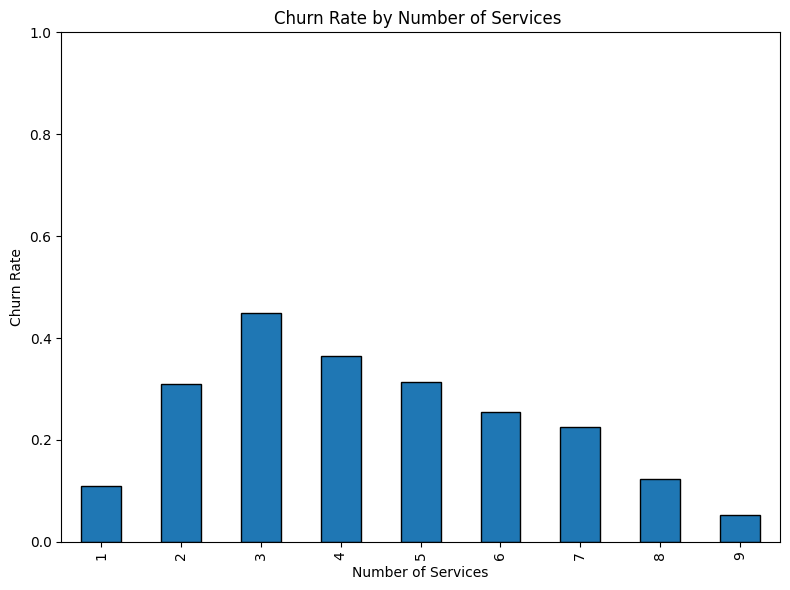

In [38]:
service_columns = [
    "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", 
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"
]

# Create a new column: Internet as a service (1 if has internet, 0 if no)
dp["HasInternetService"] = dp["InternetService"].apply(lambda x: 0 if x == 0 else 1)

# Now add 'HasInternetService' to the list of service features
all_service_columns = service_columns + ["HasInternetService"]

# Calculate the number of services each customer has
dp["NumServices"] = dp[all_service_columns].sum(axis=1)

# Group by number of services and calculate churn rate
churn_rate_by_services = dp.groupby("NumServices")["Churn"].mean()

# Print
print("Churn rate by number of services (including Internet Service):")
print(churn_rate_by_services)

# Plot
plt.figure(figsize=(8,6))
churn_rate_by_services.plot(kind="bar", edgecolor='black')

plt.title("Churn Rate by Number of Services ")
plt.xlabel("Number of Services")
plt.ylabel("Churn Rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

we see that initially we have an increase in the churn rate as we increase the amount of services, but after 3 services we have a decrease

Top 5 Complaint Categories:
Internet Issue: 46.42%
Streaming TV/Movies Issue: 20.16%
Charging/Cost Issue: 15.56%
Other: 12.67%
Tech Support Issue: 5.19%


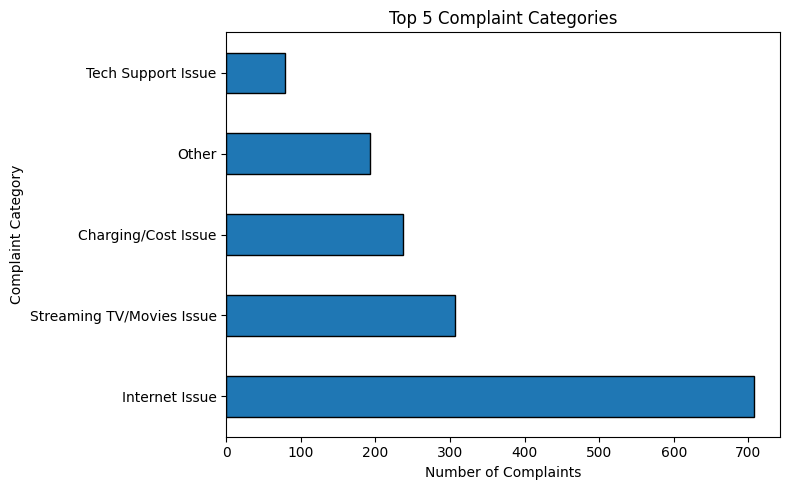

In [39]:
def categorize_complaint(text):
    text = text.lower()
    if "internet" in text or "dsl" in text:
        return "Internet Issue"
    elif "streaming" in text or "tv" in text or "movies" in text:
        return "Streaming TV/Movies Issue"
    elif "online security" in text or "onlinesecurity" in text:
        return "Online Security Issue"
    elif "tech support" in text and "support" in text:
        return "Tech Support Issue"
    elif "device protection" in text or "device plan" in text:
        return "Device Protection Issue"
    elif "charge" in text or "billing" in text or "bill" in text or "payment" in text or "overcharged" in text or "cost" in text:
        return "Charging/Cost Issue"
    else:
        return "Other"


# Apply categorization
dp2["ComplaintCategory"] = dp2["complaint"].apply(categorize_complaint)

# Count top 5 categories
top5_categories = dp2["ComplaintCategory"].value_counts().head(5)
top5_percentages = (top5_categories / top5_categories.sum()) * 100

# Print results
print("Top 5 Complaint Categories:")
for category, percentage in zip(top5_categories.index, top5_percentages):
    print(f"{category}: {percentage:.2f}%")

# (Optional) Plot
import matplotlib.pyplot as plt

top5_categories.plot(kind="barh", edgecolor="black", figsize=(8, 5))
plt.title("Top 5 Complaint Categories")
plt.xlabel("Number of Complaints")
plt.ylabel("Complaint Category")
plt.tight_layout()
plt.show()

Top 5 Complaint Categories (Professional Grouping):
Charging/Cost Issue: 29.03%
Internet Service Issue: 23.86%
Internet Speed/Connectivity Issue: 14.02%
Streaming TV/Movies Issue: 13.64%
Other: 9.16%


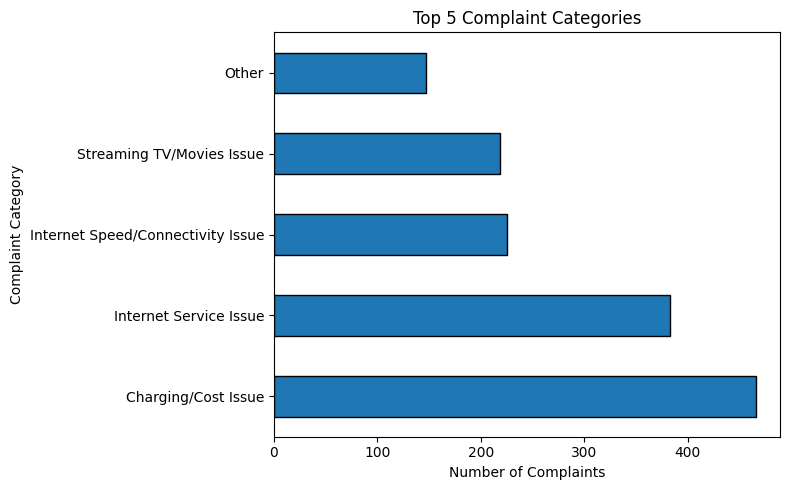

In [40]:
def categorize_complaint(text):
    text = text.lower()
    
    # Billing / Charging Problems
    if "charge" in text or "billing" in text or "bill" in text or "payment" in text or "overcharged" in text or "cost" in text:
        return "Charging/Cost Issue"
    
    # Internet Connectivity Problems
    if "internet" in text or "dsl" in text or "fiber" in text:
        # Specific slow connection complaints
        if "slow" in text or "unstable" in text or "lag" in text or "latency" in text or "connection drops" in text:
            return "Internet Speed/Connectivity Issue"
        return "Internet Service Issue"
    
    # Streaming Services Problems
    if "streaming" in text or "tv" in text or "movies" in text:
        return "Streaming TV/Movies Issue"
    
    # Online Security Problems
    if "online security" in text or "onlinesecurity" in text:
        return "Online Security Issue"
    
    # Tech Support Problems
    if "tech support" in text or ("support" in text and "agent" in text) or "help desk" in text:
        return "Tech Support Issue"
    
    # Device Protection Problems
    if "device protection" in text or "device plan" in text:
        return "Device Protection Issue"
    
    # Service Outage Problems
    if "outage" in text or "no service" in text or "service down" in text or "interruption" in text:
        return "Service Outage"
    
    # Installation / Setup Problems
    if "installation" in text or "setup" in text or "activation" in text or "technician" in text:
        return "Setup/Installation Issue"
    
    # Customer Service Problems (human interaction)
    if "rude" in text or "unhelpful" in text or "customer service" in text or "call center" in text:
        return "Customer Service Issue"
    
    # Contract / Cancellation Problems
    if "contract" in text or "termination" in text or "early fee" in text or "cancellation" in text or "switching provider" in text:
        return "Contract/Cancellation Issue"
    
    # Miscommunication / Misinformation
    if "was told" in text or "misinformed" in text or "wrong info" in text or "promised" in text:
        return "Miscommunication Issue"
    
    return "Other"


dp2["ComplaintCategory"] = dp2["complaint"].apply(categorize_complaint)

# See the final grouped results
top_categories = dp2["ComplaintCategory"].value_counts()
top5_categories = top_categories.head(5)
top5_percentages = (top5_categories / top_categories.sum()) * 100

# Print nicely
print("Top 5 Complaint Categories (Professional Grouping):")
for category, percentage in zip(top5_categories.index, top5_percentages):
    print(f"{category}: {percentage:.2f}%")

# Plot
import matplotlib.pyplot as plt
top5_categories.plot(kind="barh", edgecolor="black", figsize=(8, 5))
plt.title("Top 5 Complaint Categories")
plt.xlabel("Number of Complaints")
plt.ylabel("Complaint Category")
plt.tight_layout()
plt.show()

ANALYZE THE COMPLAINTS

In [41]:
merged = pd.merge(dp2, dp1, on="customerID", how="left")
merged.head()

,customerID,complaint,complaint_number,ComplaintCategory,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9565-DJPIB,The streaming TV service frequently buffers or...,1,Charging/Cost Issue,0,0,0,1,4,1,...,0,0,1,0,1,0,2,89.6,365.65,1
1,4342-HFXWS,The DSL internet service has been inconsistent...,1,Internet Speed/Connectivity Issue,0,0,1,1,48,1,...,1,1,1,0,2,0,3,69.7,3023.65,0
2,4342-HFXWS,The streaming TV service often buffers excessi...,2,Internet Service Issue,0,0,1,1,48,1,...,1,1,1,0,2,0,3,69.7,3023.65,0
3,4342-HFXWS,"Despite having tech support included, it takes...",3,Tech Support Issue,0,0,1,1,48,1,...,1,1,1,0,2,0,3,69.7,3023.65,0
4,4342-HFXWS,The device protection plan I pay for did not c...,4,Device Protection Issue,0,0,1,1,48,1,...,1,1,1,0,2,0,3,69.7,3023.65,0


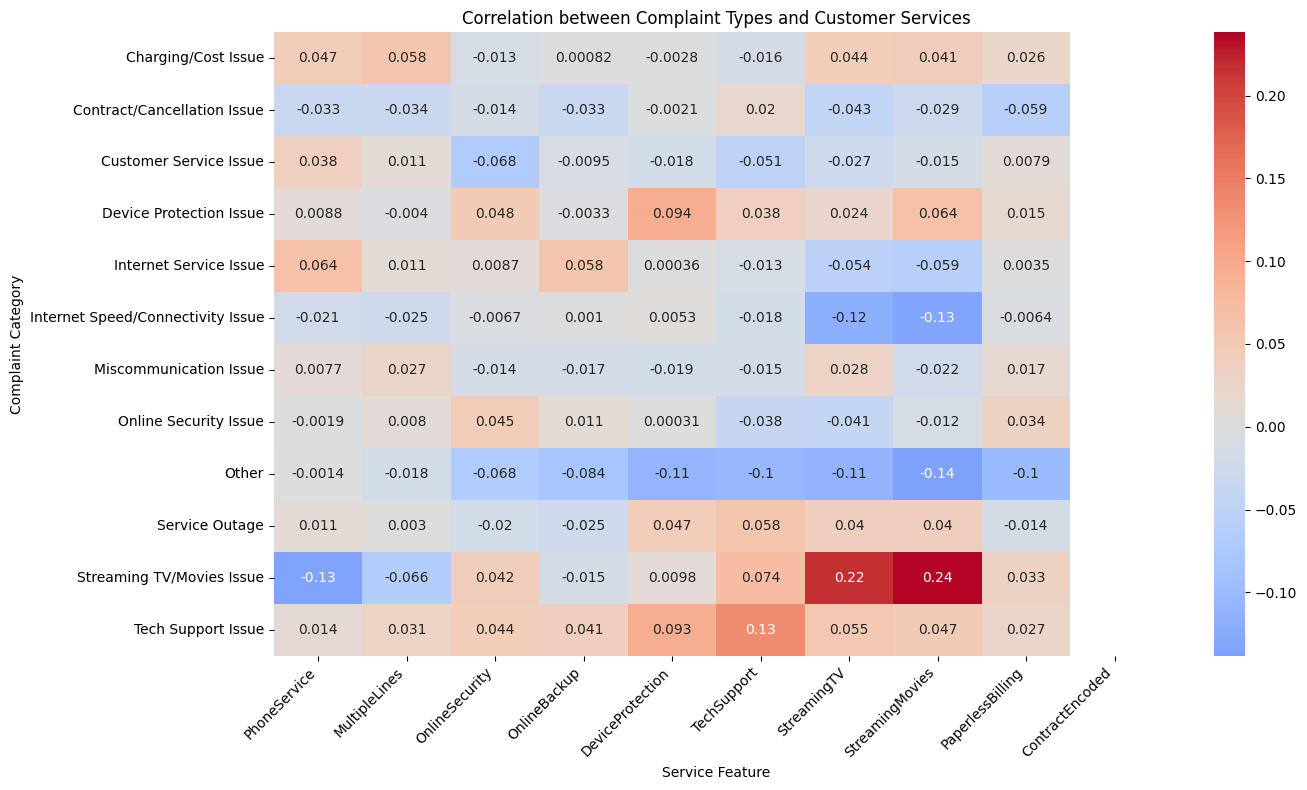

In [42]:
complaints_onehot = pd.get_dummies(merged["ComplaintCategory"])

# Now select the service columns
service_columns = [
    "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
    "StreamingMovies", "PaperlessBilling", "Contract"
]

# (Optional: encode Contract into numbers if it’s categorical)
merged["ContractEncoded"] = merged["Contract"].map({"Month-to-month": 0, "One year": 1, "Two year": 2})

# Combine
services_data = merged[[
    "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "PaperlessBilling", "ContractEncoded"
]]  # Notice we use ContractEncoded instead of Contract

# Now build the correlation matrix
correlation_matrix = complaints_onehot.join(services_data).corr()

# Slice to see only service columns vs complaint categories
complaint_vs_service_corr = correlation_matrix.loc[complaints_onehot.columns, services_data.columns]

plt.figure(figsize=(14, 8))
sns.heatmap(complaint_vs_service_corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation between Complaint Types and Customer Services")
plt.xlabel("Service Feature")
plt.ylabel("Complaint Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
